In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import spacy
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
# from transformers import TFBertModel
# from transformers import BertTokenizer
import tensorflow_hub as hub
import tensorflow_text as text
import pickle

In [2]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [4]:
bert_encoder = hub.KerasLayer(tfhub_handle_encoder)
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess)

In [15]:
print(bert_encoder.get_config())
print(bert_preprocess.get_config())

{'name': 'keras_layer', 'trainable': False, 'dtype': 'float32', 'handle': 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1'}
{'name': 'keras_layer_1', 'trainable': False, 'dtype': 'float32', 'handle': 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'}


In [12]:
# import pickle
# import joblib
# bert_encoder_path = 'models/tfhub/bert_encoder.pkl'
# bert_preprocess_path = 'tokenizers/tfhub/bert_preprocess.pkl'

# # pickle.dump(bert_encoder, open(bert_encoder_path, 'wb'))
# # pickle.dump(bert_preprocess, open(bert_preprocess_path, 'wb'))

# # bert_encoder = pickle.load(open(bert_encoder_path,'rb'))
# # bert_preprocess = pickle.load(open(bert_preprocess_path,'rb'))

# joblib.dump(bert_encoder, bert_encoder_path)
# joblib.dump(bert_preprocess, bert_preprocess_path)

# bert_encoder = joblib.load(bert_encoder_path)
# bert_preprocess = joblib.load(bert_preprocess_path)

TypeError: cannot pickle 'tensorflow.python.client._pywrap_tf_session.TF_Operation' object

In [16]:
print(tf. __version__)

2.10.0


In [17]:
df_clean = pd.read_csv('data/cleaned_reviews.csv')

In [18]:
df_clean.shape

(17340, 4)

In [19]:
df_clean.columns

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [20]:
df_clean.drop(columns=['cleaned_review_length','review_score'],inplace=True)

**Checking for Null Vaules and Duplicates**

In [22]:
df_clean.isna().sum()

sentiments        0
cleaned_review    3
dtype: int64

In [23]:
df_clean.dropna(inplace=True)

In [24]:
df_clean.shape

(17337, 2)

In [25]:
df_clean

,sentiments,cleaned_review
0,positive,i wish would have gotten one earlier love it a...
1,neutral,i ve learned this lesson again open the packag...
2,neutral,it is so slow and lags find better option
3,neutral,roller ball stopped working within months of m...
4,neutral,i like the color and size but it few days out ...
...,...,...
17335,positive,i love this speaker and love can take it anywh...
17336,positive,i use it in my house easy to connect and loud ...
17337,positive,the bass is good and the battery is amazing mu...
17338,positive,love it


In [26]:
# Mapping was changed due to the use of a neural network architecture
sentiment_mapping = {'negative':0,'neutral':1,'positive':2} 
df_clean['sentiment_label'] = df_clean.sentiments.map(sentiment_mapping)
df_clean.drop(columns=['sentiments'],inplace=True)

In [27]:
df_clean

,cleaned_review,sentiment_label
0,i wish would have gotten one earlier love it a...,2
1,i ve learned this lesson again open the packag...,1
2,it is so slow and lags find better option,1
3,roller ball stopped working within months of m...,1
4,i like the color and size but it few days out ...,1
...,...,...
17335,i love this speaker and love can take it anywh...,2
17336,i use it in my house easy to connect and loud ...,2
17337,the bass is good and the battery is amazing mu...,2
17338,love it,2


In [28]:
labels = tf.keras.utils.to_categorical(df_clean.sentiment_label.values, num_classes=3, dtype='int8')

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train,y_test= train_test_split(
                                            df_clean['cleaned_review'],labels,test_size=.2,random_state=42, 
                                            stratify=labels)


In [126]:
# Model Building
# BERT LAYERS
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string,name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
intermediate_layer1 = tf.keras.layers.Dense(512, activation="relu", name="intermediate_layer1")(outputs["pooled_output"])
bn_layer1 = tf.keras.layers.BatchNormalization()(intermediate_layer1)
dropout1 = tf.keras.layers.Dropout(0.2)(bn_layer1)

# intermediate_layer2 = tf.keras.layers.Dense(256, activation="relu", name="intermediate_layer2")(dropout1)
# bn_layer2 = tf.keras.layers.BatchNormalization()(intermediate_layer2)
# dropout2 = tf.keras.layers.Dropout(0.2)(bn_layer2)

# intermediate_layer3 = tf.keras.layers.Dense(128, activation="relu", name="intermediate_layer3")(dropout2)
# bn_layer3 = tf.keras.layers.BatchNormalization()(intermediate_layer3)
# dropout3 = tf.keras.layers.Dropout(0.2)(bn_layer3)

# intermediate_layer4 = tf.keras.layers.Dense(64, activation="relu", name="intermediate_layer4")(dropout3)
# bn_layer4 = tf.keras.layers.BatchNormalization()(intermediate_layer4)
# dropout4 = tf.keras.layers.Dropout(0.2)(bn_layer4)

intermediate_layer5 = tf.keras.layers.Dense(64, activation="relu", name="intermediate_layer5")(dropout1)
bn_layer5 = tf.keras.layers.BatchNormalization()(intermediate_layer5)
dropout5 = tf.keras.layers.Dropout(0.2)(bn_layer5)

# Final output
output_layer = tf.keras.layers.Dense(3,activation="softmax", name="output_layer")(dropout5)

In [127]:
model = tf.keras.Model(inputs=[text_input], outputs=output_layer)

In [128]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [134]:
# Define the custom callback
class MyCustomCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(MyCustomCallback, self).__init__()

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            val_loss = logs.get('val_loss') 
            loss = logs.get('loss')
            val_acc = logs.get('val_acc') 
            acc = logs.get('acc')
            if val_loss < 0.4:
                print(f"\nValidation loss is less than 0.4. \nStopping training.\n")
                self.model.stop_training = True
            elif (loss <0.6) and (val_loss <= loss ):
                print(f"\nValidation loss is less than loss: {loss} and loss is less than 0.6\nStopping training.\n")
                self.model.stop_training = True
            elif (val_acc >= 0.75 ) or (val_loss <= 0.55  ):
                print(f"\nValidation loss is <= 0.55 or val_acc >= 0.75\nStopping training.\n")
                self.model.stop_training = True

callback = MyCustomCallback()

In [135]:
import datetime
class TimeCallback(tf.keras.callbacks.Callback):

    def on_epoch_begin(self,epoch, logs=None):
        print('Epoch: {}, begins at {}\n'.format(epoch, datetime.datetime.now().time()))

    def on_epoch_end(self,epoch, logs=None):
        print('Epoch: {}, ends at {}\n'.format(epoch, datetime.datetime.now().time()))

my_timer = TimeCallback()

In [136]:
# Learning Rate Schedulers
peak_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    mode= 'min',
    min_lr=0.00001
)

# Learning rate scheduler
def scheduler(epoch,lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

my_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
# optimizer
optimise = tf.keras.optimizers.Adam(learning_rate=0.01)
# losses
loss = tf.keras.losses.categorical_crossentropy

# metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

In [137]:
model.compile(optimizer=optimise,
            loss=loss,
            metrics=['acc',precision,recall
            ])

In [138]:
tf.keras.backend.clear_session()
bert_model_history = model.fit(X_train,y_train,epochs=20,
                        validation_split=.20,
                        batch_size=16,
                        # steps_per_epoch=5,
                        callbacks=[callback,my_scheduler,
                        peak_callback,my_timer])

Epoch: 0, begins at 08:44:13.243835

Epoch 1/20
694/694 [==============================] - ETA: 0s - loss: 0.6696 - acc: 0.7139 - precision: 0.7431 - recall: 0.6617Epoch: 0, ends at 09:48:21.608786

694/694 [==============================] - 3848s 6s/step - loss: 0.6696 - acc: 0.7139 - precision: 0.7431 - recall: 0.6617 - val_loss: 0.6002 - val_acc: 0.7394 - val_precision: 0.7746 - val_recall: 0.6975 - lr: 0.0100
Epoch: 1, begins at 09:48:21.628817

Epoch 2/20
694/694 [==============================] - ETA: 0s - loss: 0.6122 - acc: 0.7343 - precision: 0.7668 - recall: 0.6865
Validation loss is <= 0.55 or val_acc >= 0.75
Stopping training.

Epoch: 1, ends at 10:42:12.313821

694/694 [==============================] - 3231s 5s/step - loss: 0.6122 - acc: 0.7343 - precision: 0.7668 - recall: 0.6865 - val_loss: 0.5713 - val_acc: 0.7635 - val_precision: 0.8070 - val_recall: 0.6965 - lr: 0.0100


In [139]:
# Evaluate on the Test Set

score = model.evaluate(X_test, y_test, verbose=1)

109/109 [==============================] - 944s 9s/step - loss: 0.5694 - acc: 0.7552 - precision: 0.7914 - recall: 0.7036


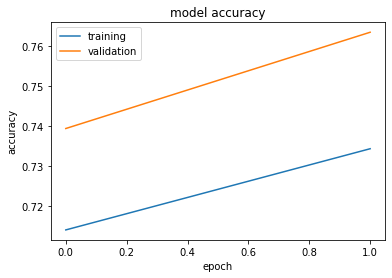

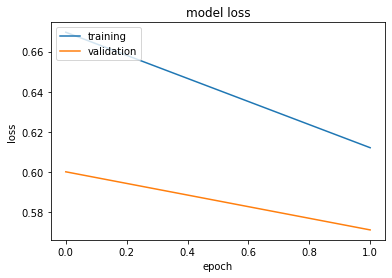

In [140]:
# Model Performance Charts

plt.plot(bert_model_history.history['acc'])
plt.plot(bert_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

plt.plot(bert_model_history.history['loss'])
plt.plot(bert_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

In [ ]:
# Saving the model
# model.save("saved_model_hub/bert_model")

### **Classification report**

109/109 [==============================] - 959s 9s/step
              precision    recall  f1-score   support

           0       0.54      0.27      0.36       307
           1       0.66      0.77      0.71      1260
           2       0.85      0.82      0.84      1901

    accuracy                           0.76      3468
   macro avg       0.68      0.62      0.64      3468
weighted avg       0.75      0.76      0.75      3468



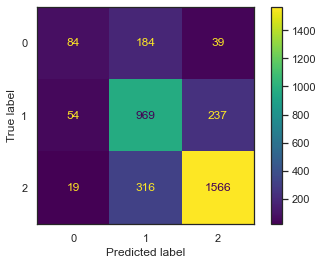

In [141]:
# Classification report test data
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_true=np.argmax(y_test, axis=1)
y_pred_test = model.predict(X_test)
y_pred_test=np.argmax(y_pred_test, axis=1)
sns.set_theme(style='white')
def class_report(model,y_true,pred):
    print(classification_report(y_true,pred))
    cm = confusion_matrix(y_true,pred,labels=[0,1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
    disp.plot()
    plt.show()


class_report(model,y_true,y_pred_test) 

# Original mapping
# sentiment_mapping = {'negative':-1,'neutral':0,'positive':1}

# New mapping
# negative --> 0
# neutral ---> 1
# positive --> 2

In [ ]:
# Predictions on unseen data

In [142]:
reviews =[ "I can't believe I wasted my money on this keyboard and mouse",
            "I really love this device",
            "It's quite good, but not so great. They can do better",
            "I hate this device, terrible!!!",
            "Where the hell is my refund for this damn product (mouse)",
            "I believe Ebay is so much better than the crap that is HERE!!!",
            "worst keyboard ever",
            "distasteful to the fullest!!!",
            "spoilt on the first day",
            "never shopping here again, waste of money"]

In [143]:
y_pred = model.predict(reviews)

1/1 [==============================] - 5s 5s/step


In [144]:
predictions = np.argmax(y_pred, axis = 1)
predictions

array([1, 2, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
# New mapping
# negative --> 0
# neutral ---> 1
# positive --> 2

### **Conclusion**
- BERT is a powerful model but needs to be fine-tuned to properly make use of it, as seen from the confusion matrix, there is a lot of misclassifications. 
- A larger dataset will aid in the aid and also a balanced dataset.
- Due to computational speed running on (CPU rather than GPU), a low epochs was used, but increasing the epochs or tuning the optimiser or even adding more layers will  aid in the model's performance.


### **Subclassing**

In [265]:
# Subclassing version static
class CustomBertModel(tf.keras.Model):
    def __init__(self,num_units,repetitions,**kwargs):
        super(CustomBertModel,self).__init__(**kwargs)
        self.bert_preprocess = bert_preprocess
        self.bert_encoder = bert_encoder
        self.intermediate_layers = []
        
        for i  in range(repetitions):
            self.intermediate_layers.append(
                tf.keras.layers.Dense(num_units,activation='relu',name=f"intermediate_layer{i}")
            )

            self.intermediate_layers.append(tf.keras.layers.BatchNormalization())
            self.intermediate_layers.append(tf.keras.layers.Dropout(0.2))
        
        self.output_layer = tf.keras.layers.Dense(3,activation='softmax',name="output_layer")


    def call(self,inputs):
        text_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string,name='text')
        preprocess = self.bert_preprocess(text_inputs)
        outputs = self.bert_encoder(preprocess)
        x = outputs['pooled_output']
        for layer in self.intermediate_layers:
            x = layer(x)
        
        return self.output_layer(x)


tf.keras.backend.clear_session()
subclass_model1 = CustomBertModel(64,2)
subclass_model1.compile(optimizer=optimise,
            loss=loss,
            metrics=['acc',precision,recall
            ])

subclass_model1.build(input_shape=[(None,),])  # Build the model to see the summary
subclass_model1.summary()

Model: "custom_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  {'input_word_ids': (None  0         
                             , 128),                             
                              'input_type_ids': (None            
                             , 128),                             
                              'input_mask': (None, 12            
                             8)}                                 
                                                                 
 keras_layer (KerasLayer)    {'sequence_output': (Non  109482241 
                             e, 128, 768),                       
                              'pooled_output': (None,            
                              768),                              
                              'encoder_outputs': [(No            
                             ne, 128, 768),      

In [261]:
# Subclassing version flexible - not final output
class CustomBertModel2(tf.keras.Model):
    def __init__(self,num_units:list,repetitions,**kwargs):
        super(CustomBertModel2,self).__init__(**kwargs)
        self.repetitions = repetitions
        self.num_units = num_units
        self.bert_preprocess = bert_preprocess
        self.bert_encoder = bert_encoder
        self.intermediate_layers = self.build_intermediate_layer()

    def build_intermediate_layer(self):
        layers = []
        for i in range(self.repetitions):
            
            layers.extend([
                tf.keras.layers.Dense(self.num_units[i], activation="relu",name=f"intermediate_layer{i}"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2)
            ])
        
        return layers


    def call(self,inputs):
        preprocess = self.bert_preprocess(inputs)
        outputs = self.bert_encoder(preprocess)
        x = outputs['pooled_output']
        for layer in self.intermediate_layers:
            x = layer(x)
        
        # return self.output_layer(x)
        return x

    # def build_graph(self, raw_shape):
    #     x = tf.keras.layers.Input(shape=(raw_shape), 
    #                                      ragged=True)

    #     return tf.keras.Model(inputs=[x], 
    #                           outputs=self.call(x))

num_units = [512,64]
reps = len(num_units)
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string,name='text')


subclass_model2 = CustomBertModel2(num_units=num_units,repetitions=reps)(text_input)
output = tf.keras.layers.Dense(3, name='Output_layer',activation="softmax")(subclass_model2)
model2 = tf.keras.Model(inputs=[text_input], outputs=[output])
# print(subclass_model2.summary()) # Doesn't work
print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text (InputLayer)           [(None,)]                 0         
                                                                 
 custom_bert_model2 (CustomB  (None, 64)               109911105 
 ertModel2)                                                      
                                                                 
 Output_layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 109,911,300
Trainable params: 427,907
Non-trainable params: 109,483,393
_________________________________________________________________
None


In [ ]:
model2.compile(optimizer=optimise,
            loss=loss,
            metrics=['acc',precision,recall
            ])
# Model training
tf.keras.backend.clear_session()
bert_model_history = model2.fit(X_train,y_train,epochs=20,
                        validation_split=.20,
                        batch_size=16,
                        # steps_per_epoch=5,
                        callbacks=[callback,my_scheduler,
                        peak_callback,my_timer])

# This works when ran with the previous cell

**Add block & Concatenate**

In [307]:
class AddInputLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddInputLayer,self).__init__(**kwargs)
    def call(self,inputs):
        final_output, text_input = inputs
        return final_output + text_input
        # return tf.keras.layers.Add()([final_output,text_input])

# https://stackoverflow.com/questions/72737550/why-tf-keras-layers-concatenate-adds-parameters-to-my-model
class ConcatenateLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ConcatenateLayer,self).__init__(**kwargs)
    def call(self,inputs):
        return tf.concat(inputs,axis=-1)

In [314]:
# Final: works with the next cells above and below.
class CustomBertModel3(tf.keras.Model):
    def __init__(self,num_units:list,repetitions,**kwargs):
        super(CustomBertModel3,self).__init__(**kwargs)
        self.repetitions = repetitions
        self.num_units = num_units
        self.bert_preprocess = bert_preprocess
        self.bert_encoder = bert_encoder
        self.intermediate_layers = self.build_intermediate_layer()
        self.add_layer = AddInputLayer()
        self.concat_layer = ConcatenateLayer()
        self.dense1 = tf.keras.layers.Dense(64,activation="relu",name="final_dense")

    def build_intermediate_layer(self):
        layers = []
        for i in range(self.repetitions):
            
            layers.extend([
                tf.keras.layers.Dense(self.num_units[i], activation="relu",name=f"intermediate_layer{i}"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2)
            ])
        
        return layers


    def call(self,inputs):
        preprocess = self.bert_preprocess(inputs)
        outputs1 = self.bert_encoder(preprocess)
        outputs2 = outputs1['pooled_output']
        for layer in self.intermediate_layers:
            x = layer(outputs2)
        x = self.add_layer([x,outputs2])
        # x = self.concat_layer([x, outputs2])
        
        # return x
        return self.dense1(x)

num_units = [512,64]
reps = len(num_units)


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
subclass_model3 = CustomBertModel3(num_units=num_units, repetitions=reps)(text_input)
output = tf.keras.layers.Dense(3, name='Output_layer', activation="softmax")(subclass_model3)

# Create the final model using tf.keras.Model
model3 = tf.keras.Model(inputs=[text_input], outputs=[output])
print(model3.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text (InputLayer)           [(None,)]                 0         
                                                                 
 custom_bert_model3_2 (Custo  (None, 64)               109980545 
 mBertModel3)                                                    
                                                                 
 Output_layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 109,980,740
Trainable params: 495,427
Non-trainable params: 109,485,313
_________________________________________________________________
None


In [ ]:
model3.compile(optimizer=optimise,
            loss=loss,
            metrics=['acc',precision,recall
            ])
# Model training
bert_model_history = model3.fit(X_train,y_train,epochs=20,
                        validation_split=.20,
                        batch_size=16,
                        # steps_per_epoch=5,
                        callbacks=[callback,my_scheduler,
                        peak_callback,my_timer])

# This works when ran with the previous cell